In [76]:
import cv2
import os
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [32]:
img_folder = "calibration5"
img_paths = [os.path.join(img_folder, f) for f in os.listdir(img_folder)]
print(img_paths[0:2])

['calibration5\\GOPR01170000.jpg', 'calibration5\\GOPR01170001.jpg']


In [38]:
imgs = [cv2.imread(path) for path in img_paths]

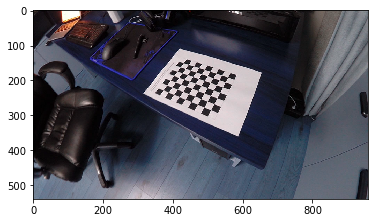

In [39]:
plt.imshow(imgs[50])
plt.show()

In [48]:
cv2.findChessboardCornersSB(imgs[5], (10, 8))

(False, None)

Я попробовал разные картинки из датасета, но так ничего и не получил, поэтому решил взять другой датасет и попробовать на нем

In [49]:
img_folder = "calib_example"
img_paths = [os.path.join(img_folder, f) for f in os.listdir(img_folder)]
print(img_paths[0:2])

['calib_example\\Image1.tif', 'calib_example\\Image10.tif']


In [98]:
imgs = [cv2.imread(path) for path in img_paths]
img = imgs[2]

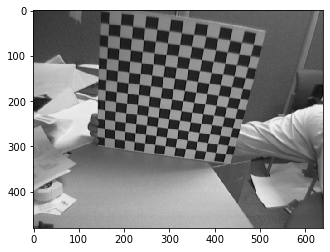

In [99]:
plt.imshow(img)
plt.show()

In [105]:
result, corners = cv2.findChessboardCorners(img, (12, 12))

Тут уже пошло лучше, поэтому работать буду с этим датасетом

In [106]:
corn_img = cv2.drawChessboardCorners(img, (12, 12), corners, result)

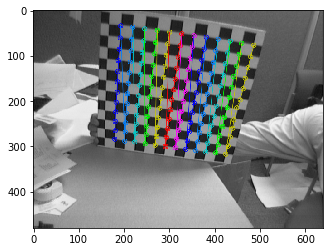

In [107]:
plt.imshow(corn_img)
plt.show()

In [114]:
objp = np.zeros((12*12,3), np.float32)
objp[:,:2] = np.mgrid[0:12,0:12].T.reshape(-1,2)

In [117]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objp], [corners], img.shape[0:2], None, None)

In [121]:
print(f"ret: {ret}\n mtx: {mtx}\n dist: {dist}\n rvecs: {rvecs}\n tvecs: {tvecs}")

ret: 0.5172624750144924
 mtx: [[1.23572849e+03 0.00000000e+00 2.23019022e+02]
 [0.00000000e+00 2.00641586e+03 3.09991689e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
 dist: [[-1.60531417e+00  1.22782858e+01 -4.38104324e-02  7.35554015e-02
  -7.54725069e+01]]
 rvecs: [array([[ 0.77976214],
       [ 0.80930559],
       [-1.32365692]])]
 tvecs: [array([[-1.95024747],
       [-0.71135351],
       [54.70857041]])]


Попробуем теперь для всех картинок из датасета

In [123]:
points2d = []
points3d = []
for img in imgs:
    result, corners = cv2.findChessboardCorners(img, (12, 12))
    if result is True:
        points2d.append(corners)
        points3d.append(objp)

In [124]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(points3d, points2d, img.shape[0:2], None, None)

In [131]:
print(f"Camera matrix:\n {mtx}\n\n Distorsion:\n {dist}\n\n")

Camera matrix:
 [[656.88929461   0.         303.32494941]
 [  0.         657.48282477 243.44389711]
 [  0.           0.           1.        ]]

 Distorsion:
 [[-2.60475711e-01  2.31844154e-01 -2.30257052e-04  3.11439895e-06
  -2.83662292e-01]]




Внутренние параметры камеры и параметры дисторсии были успешно найдены. Задачу считаю выполненой.